In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
data=np.loadtxt("/content/drive/My Drive/COVID-CT/finaDataset.txt")
testData=np.loadtxt("/content/drive/My Drive/COVID-CT/finaTestset.txt")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
labels=np.take(data,[6],axis=1).flatten()
testLabels=np.take(testData,[6],axis=1).flatten() 

print(labels)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
data=np.delete(data,[6],axis=1)
testData=np.delete(testData,[6],axis=1)
np.shape(data)
np.shape(testData)
# np.shape(labels)

(116, 6)

In [ ]:
np.count_nonzero(testLabels==0)

57

In [ ]:
clf = MLPClassifier(solver='sgd', hidden_layer_sizes=(4,2), activation='identity')


In [ ]:
clf.fit(data, labels)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
pred = clf.predict(testData)

In [ ]:
confusion_matrix(testLabels, pred)

array([[47, 10],
       [27, 32]])

In [ ]:
32/59

0.5423728813559322

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3,weights='distance')
neigh.fit(data, labels)
n_pred = neigh.predict(testData)



In [ ]:
confusion_matrix(testLabels, n_pred)

array([[47, 10],
       [24, 35]])

In [ ]:
sklearn.metrics.accuracy_score(testLabels, n_pred)

0.7068965517241379

In [ ]:
from sklearn.metrics import f1_score
f1_score(testLabels, n_pred, average='macro')

0.7037259615384615

In [ ]:
from sklearn.metrics import recall_score
recall_score(testLabels, n_pred, average='weighted')

0.7068965517241379

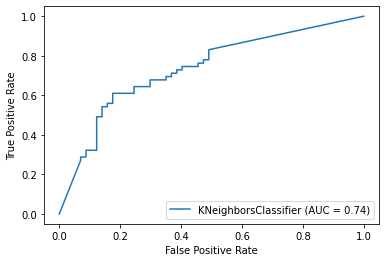

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(neigh, testData, testLabels)

In [ ]:
46/57

0.8070175438596491

[[44 13]
 [23 36]]
#
0.6896551724137931
##


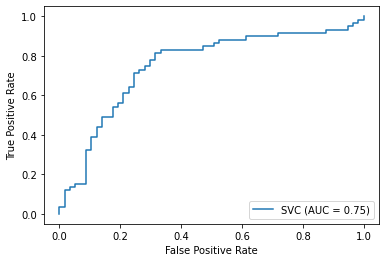

In [ ]:
from sklearn import svm
from sklearn import metrics

clf = svm.SVC(kernel='rbf')
clf.fit(data,labels)
pred=clf.predict(testData)
print(confusion_matrix(testLabels,pred))

print("#")

print(sklearn.metrics.accuracy_score(testLabels, pred))

print("##")
metrics.plot_roc_curve(clf, testData, testLabels)

In [ ]:
36/59

0.6101694915254238

In [ ]:
data0=[]
data1=[]
labels0=[]
labels1=[]

for d,l in zip(data,labels):
  if(l==1):
    data1.append(d)
  else:
    data0.append(d)

data0=np.array(data0)
data1=np.array(data1)

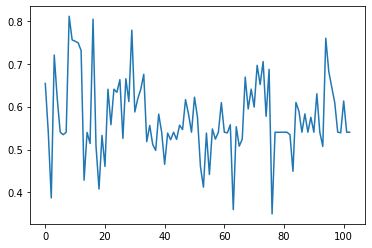

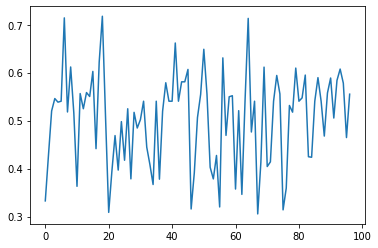

In [ ]:
fig1=plt.figure()
plt.plot(data0[:,2])

fig2=plt.figure()
plt.plot(data1[:,2])

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
ypred=clf.fit(data,labels).predict(testData)
confusion_matrix(testLabels,ypred)

array([[42, 15],
       [20, 39]])

In [ ]:
clf=sklearn.naive_bayes.MultinomialNB()
ypred=clf.fit(data,labels).predict(testData)
confusion_matrix(testLabels,ypred)

array([[45, 12],
       [26, 33]])